In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# loading the dataset to a Pandas DataFrame
df = pd.read_csv('creditcard.csv')

In [7]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [8]:
# first 5 rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [10]:
# dataset informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
# checking the number of missing values in each column
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [39]:
# distribution of legit transactions & fraudulent transactions
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

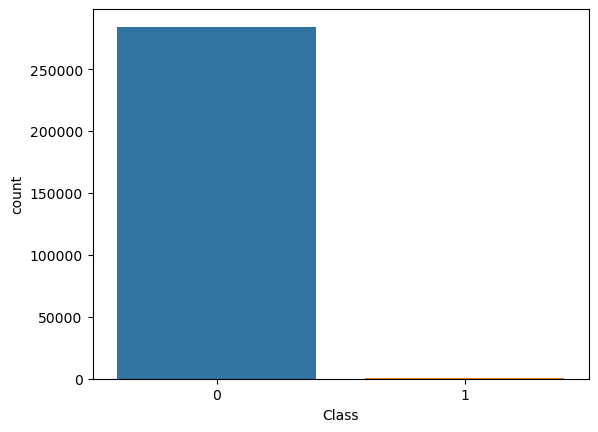

In [42]:
sns.countplot(df,x='Class') 

### This Dataset is highly unblanced

### 0 --> Normal Transaction

### 1 --> fraudulent transaction

In [45]:
# separating the data for analysis
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [46]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [47]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean          0.003437
std           0.009735
min           0.000000
25%           0.000220
50%           0.000856
75%           0.002999
max           1.000000
Name: Amount, dtype: float64

In [48]:
fraud.Amount.describe()

count    492.000000
mean       0.004757
std        0.009991
min        0.000000
25%        0.000039
50%        0.000360
75%        0.004122
max        0.082747
Name: Amount, dtype: float64

In [50]:
# compare the values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,0.003437
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,0.004757


### Under-Sampling

### Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

### Number of Fraudulent Transactions --> 492

In [51]:
legit_sample = legit.sample(n=492)

### Concatenating two DataFrames

In [52]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [53]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
21085,31456.0,-2.492067,1.734193,-1.759042,1.202401,-1.423626,-1.085748,-0.347974,1.612924,-0.336522,...,0.209752,0.432147,0.071778,0.382699,-0.708809,-0.387921,0.366045,0.012725,0.003503,0
279295,168766.0,-1.058498,-5.275124,-3.250743,1.481445,-1.645347,-0.842983,2.495091,-0.808582,0.577015,...,0.834124,-1.141937,-1.237868,0.098768,-0.586449,-0.250599,-0.361640,0.218690,0.063407,0
271860,164785.0,-0.276207,1.235837,-0.703825,-0.592506,0.640260,-0.517926,0.588780,0.444138,-0.578715,...,-0.218610,-0.640756,0.186805,0.614520,-0.432548,0.092373,0.095396,0.014211,0.000700,0
58867,48588.0,1.062718,0.045658,0.956651,2.329207,-0.092075,1.259291,-0.556756,0.334764,-0.188298,...,-0.075727,-0.186186,-0.187885,-0.941832,0.446688,0.010538,0.031639,0.024265,0.002269,0
219252,141651.0,2.022737,-0.316937,-1.029341,0.109777,-0.245932,-0.764632,-0.183238,-0.054053,0.841499,...,-0.482438,-1.592027,0.579420,0.555125,-0.764601,-0.003728,-0.090316,-0.042698,0.001028,0


In [54]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,0.015180,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.000030,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,0.003032,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.009536,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,0.001655,1


In [55]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [56]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,98540.841463,0.040932,0.008558,-0.042124,-0.116282,-0.015999,-0.185669,0.076710,-0.030570,-0.081623,...,0.036710,0.017433,0.016115,0.004524,-0.027952,-0.037527,0.024351,0.026847,0.010576,0.003671
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,0.004757


### Splitting the data into Features & Targets

In [57]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [58]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
21085    31456.0 -2.492067  1.734193 -1.759042  1.202401 -1.423626 -1.085748   
279295  168766.0 -1.058498 -5.275124 -3.250743  1.481445 -1.645347 -0.842983   
271860  164785.0 -0.276207  1.235837 -0.703825 -0.592506  0.640260 -0.517926   
58867    48588.0  1.062718  0.045658  0.956651  2.329207 -0.092075  1.259291   
219252  141651.0  2.022737 -0.316937 -1.029341  0.109777 -0.245932 -0.764632   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [59]:
print(Y)

21085     0
279295    0
271860    0
58867     0
219252    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


### Split the data into Training data & Testing Data

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [61]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [62]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Training

### Logistic Regression

In [63]:
logistic_regression = LogisticRegression()

In [64]:
# training the Logistic Regression Model with Training Data
logistic_regression.fit(X_train, Y_train)

LogisticRegression()

### Model Evaluation

In [65]:
# accuracy on training data
X_train_prediction = logistic_regression.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [66]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9529860228716646


In [67]:
# accuracy on test data
X_test_prediction = logistic_regression.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [68]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9187817258883249


In [71]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(Y_test, X_test_prediction)
recall = recall_score(Y_test, X_test_prediction)
f1 = f1_score(Y_test, X_test_prediction)

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Precision: 0.9659090909090909
Recall: 0.8673469387755102
F1-score: 0.9139784946236559


### Random Forest

In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [86]:
# Initialize and train the Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, Y_train)


RandomForestClassifier(random_state=42)

In [87]:
# Predictions on test data
Y_test_predictions = random_forest.predict(X_test)

In [88]:
# Predictions on training data
Y_train_predictions = random_forest.predict(X_train)


In [89]:
# Calculate accuracy on test data
test_data_accuracy = accuracy_score(Y_test_predictions, Y_test)

In [90]:
# Calculate accuracy on training data
train_data_accuracy = accuracy_score(Y_train_predictions, Y_train)  


In [91]:
print('Accuracy on Testing data:', test_data_accuracy)
print('Accuracy on Training data:', train_data_accuracy)

Accuracy on Testing data: 0.9187817258883249
Accuracy on Training data: 1.0


In [92]:
# Calculate precision, recall, and F1-score
precision = precision_score(Y_test, Y_test_predictions)
recall = recall_score(Y_test, Y_test_predictions)
f1 = f1_score(Y_test, Y_test_predictions)

In [93]:
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Precision: 0.9659090909090909
Recall: 0.8673469387755102
F1-score: 0.9139784946236559
